# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_ind
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

<b><font color='blue'> __A:__ For medical charges, histogram, sample mean, sample standard deviation are below.  The histogram shows that the data do not follow a normal distribution, so mean, standard deviation do not have the same meaning for these data as they would for data following a normal distribution.
</font></b>

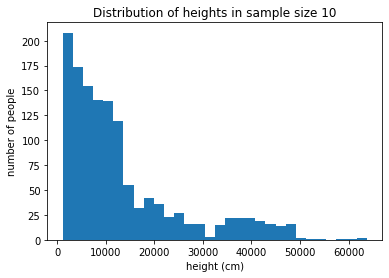

In [4]:
_ = plt.hist(medical['charges'], bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')

In [5]:
sample_mean = np.mean(medical['charges'])
sample_std = np.std(medical['charges'])
sample_n = np.size(medical['charges'])
print('Sample mean: ',sample_mean)
print('Sample std dev: ',sample_std)
print('Sample size: ',sample_n)

Sample mean:  13270.422265141257
Sample std dev:  12105.484975561605
Sample size:  1338


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

<b><font color='blue'> __A:__ The random sample of charges can be used to make inferences about the mean charge under the assumption that a large sample and the central limit theorem justifies the use of statistics based on the normal distribution, such as the t-statistic.  A one-sample t-test can be used to test the null hypothesis that the mean charge has not fallen below $12,000. 
</font></b>

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

<b><font color='blue'> __A:__ A one-sided confidence interval is appropriate to test the one-sided null hypothesis that the mean charge has not fallen below 12,000. The one-sided confidence interval contains 12,000, so the null hypothesis is not rejected and the administrator should not be concerned.
</font></b>

In [6]:
sample_ste = sample_mean/np.sqrt(sample_n)
tcrit = t.ppf(0.05, sample_n-1)
sample_moe = sample_ste * tcrit
sample_cilo = sample_mean + sample_moe

print('Sample mean: ',sample_mean)
print('Sample std err: ',sample_ste)
print('t critical value: ',tcrit)
print('95% margin of error, one-sided (using t critical value): ',sample_moe)
print('95% confidence interval, one-sided (using t critical value): [',sample_cilo,', infinity ]')

Sample mean:  13270.422265141257
Sample std err:  362.79115115122346
t critical value:  -1.6459941145571324
95% margin of error, one-sided (using t critical value):  -597.1520996083209
95% confidence interval, one-sided (using t critical value): [ 12673.270165532937 , infinity ]


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

<b><font color='blue'> __A:__ The null hypothesis is that people with and without insurance are charged the same amount.  The alternative hypothesis is that people with and without insurance are charged different amounts.  The t-test with pooled standard deviation assumes that the population variance is the same between the groups of people with and without insurance.
</font></b>

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

<b><font color='blue'> __A:__ Manual calculation:
</font></b>

In [7]:
#means, standard deviations, sample sizes by group
#data by insurance claim group
is_insclaim = medical['insuranceclaim'] == 1
ins_charges = medical.loc[is_insclaim,'charges']
unins_charges = medical.loc[~is_insclaim,'charges']
#means
ins_mean = np.mean(ins_charges)
unins_mean = np.mean(unins_charges)
#st devs
ins_std = np.std(ins_charges)
unins_std = np.std(unins_charges)
#sample sizes
ins_n = np.size(ins_charges)
unins_n = np.size(unins_charges)
#std dev pooled
std_pooled = np.sqrt(( (ins_n - 1)*ins_std**2 + (unins_n - 1)*unins_std**2 )/(ins_n + unins_n - 2))
#t-statistic
t_stat = (ins_mean - unins_mean)/(std_pooled*np.sqrt(1/ins_n + 1/unins_n))
#t critical value
t_crit = t.ppf(0.975, ins_n + unins_n - 2)
#p_value
p_value = 1 - t.cdf(t_stat, ins_n + unins_n - 2)


print('Sample means (ins, unins): ',ins_mean,' ',unins_mean)
print('Sample std devs (ins, unins): ',ins_std,' ',unins_std)
print('Sample sizes (ins, unins): ',ins_n,' ',unins_n)
print('Pooled std dev: ',std_pooled)
print('t statistic: ',t_stat)
print('t critical value: ',t_crit)
print('p value: ',p_value)

Sample means (ins, unins):  16423.928276537663   8821.421892306294
Sample std devs (ins, unins):  14036.956250260411   6440.699841605233
Sample sizes (ins, unins):  783   555
Pooled std dev:  11512.282899205744
t statistic:  11.901306943555385
t critical value:  1.9617412190546957
p value:  0.0


<b><font color='blue'> __A:__ scipy.stats calculation:
</font></b>

In [8]:
t_stat2, p_value2 = ttest_ind(ins_charges, unins_charges, axis=0, equal_var=True, alternative='two-sided')
                                             
print('t statistic: ',t_stat2)
print('p value: ',p_value2)                                         
                                             

t statistic:  11.893299030876712
p value:  4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

<b><font color='blue'> __A:__ There is no z-test for a sample in scipy.stats because the z-test assumes the variance of the population is known.  In the case of known variance, the normal cdf and inverse cdf functions can be used.
</font></b>

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test